In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.optimize as opt
import statsmodels.api as sm

NormaltestResult(statistic=0.5997860677501821, pvalue=0.7408974673743264)
0.9741243124008179
0.6569511890411377


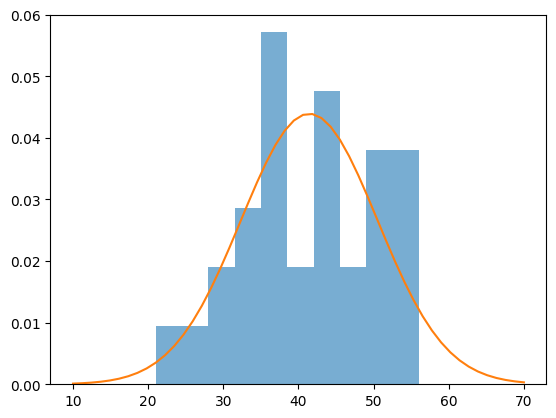

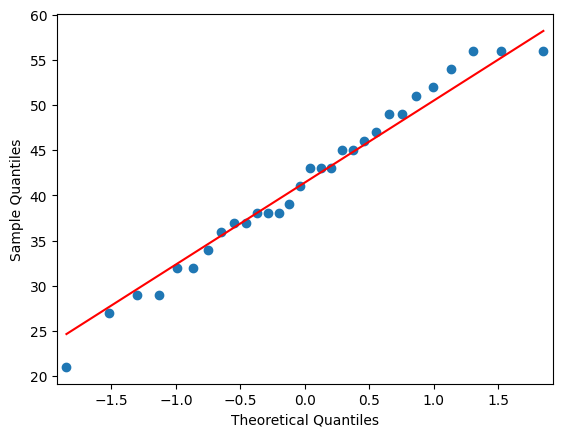

In [87]:
sample_data = np.array(
    [
        34,
        54,
        46,
        21,
        56,
        43,
        39,
        43,
        29,
        56,
        38,
        41,
        45,
        47,
        37,
        52,
        51,
        49,
        32,
        36,
        27,
        43,
        29,
        56,
        37,
        38,
        32,
        49,
        45,
        38,
    ]
)

sample_mean = np.mean(sample_data)
sample_median = np.median(sample_data)
sample_mode = stats.mode(sample_data)

df = pd.DataFrame(
    {"mean": [sample_mean], "median": [sample_median], "mode": [sample_mode[0]]}
)

df
plt.hist(sample_data, density=True, alpha=0.6)
plt.plot(x, stats.norm.pdf(x, mu, std))

x = np.linspace(10, 70)
mu, std = stats.norm.fit(sample_data)
sm.qqplot(sample_data, line="s")

statistic, p_value_shapiro= stats.shapiro((sample_data))
dag = stats.normaltest(sample_data)
print(dag)

print(statistic)
print(p_value_shapiro)



Original skewness: -0.021378034454441423
Transformed skewness: 0.020138009779051586


(array([ 1.,  2.,  3.,  6.,  9., 15., 19., 24., 22., 30., 22., 22., 12.,
         8.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([ 6.9119239 ,  7.34039445,  7.768865  ,  8.19733555,  8.6258061 ,
         9.05427665,  9.4827472 ,  9.91121775, 10.3396883 , 10.76815885,
        11.1966294 , 11.62509995, 12.0535705 , 12.48204105, 12.91051159,
        13.33898214, 13.76745269, 14.19592324, 14.62439379, 15.05286434,
        15.48133489]),
 <BarContainer object of 20 artists>)

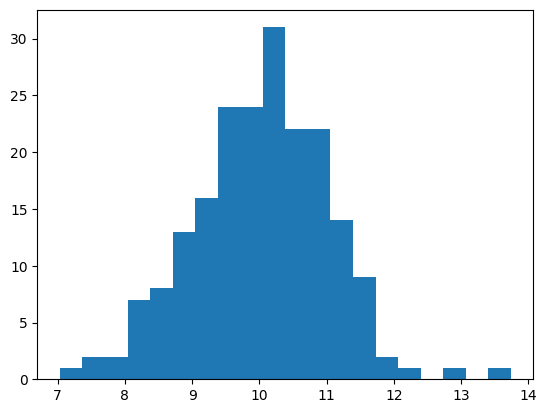

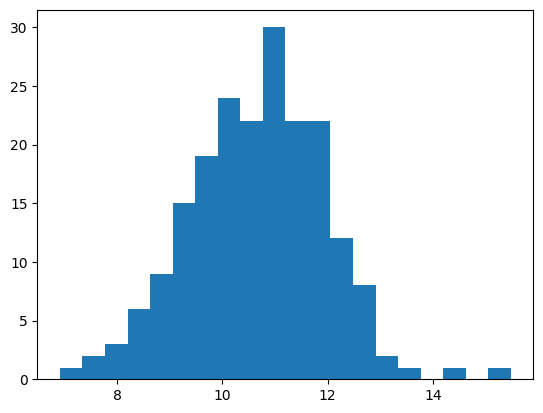

In [168]:
vals = np.random.normal(10, 1, 200)

skew = stats.skew(vals)
_, l = stats.boxcox(vals)

transformed_data = stats.boxcox(vals, lmbda=l)

print("Original skewness:", skew)
print("Transformed skewness:", stats.skew(transformed_data))

plt.hist(vals, bins=20)
plt.figure()
plt.hist(transformed_data, bins=20)

[[-1.00000000e+00 -9.90000000e-01 -9.80000000e-01 -9.70000000e-01
  -9.60000000e-01 -9.50000000e-01 -9.40000000e-01 -9.30000000e-01
  -9.20000000e-01 -9.10000000e-01 -9.00000000e-01 -8.90000000e-01
  -8.80000000e-01 -8.70000000e-01 -8.60000000e-01 -8.50000000e-01
  -8.40000000e-01 -8.30000000e-01 -8.20000000e-01 -8.10000000e-01
  -8.00000000e-01 -7.90000000e-01 -7.80000000e-01 -7.70000000e-01
  -7.60000000e-01 -7.50000000e-01 -7.40000000e-01 -7.30000000e-01
  -7.20000000e-01 -7.10000000e-01 -7.00000000e-01 -6.90000000e-01
  -6.80000000e-01 -6.70000000e-01 -6.60000000e-01 -6.50000000e-01
  -6.40000000e-01 -6.30000000e-01 -6.20000000e-01 -6.10000000e-01
  -6.00000000e-01 -5.90000000e-01 -5.80000000e-01 -5.70000000e-01
  -5.60000000e-01 -5.50000000e-01 -5.40000000e-01 -5.30000000e-01
  -5.20000000e-01 -5.10000000e-01 -5.00000000e-01 -4.90000000e-01
  -4.80000000e-01 -4.70000000e-01 -4.60000000e-01 -4.50000000e-01
  -4.40000000e-01 -4.30000000e-01 -4.20000000e-01 -4.10000000e-01
  -4.00000

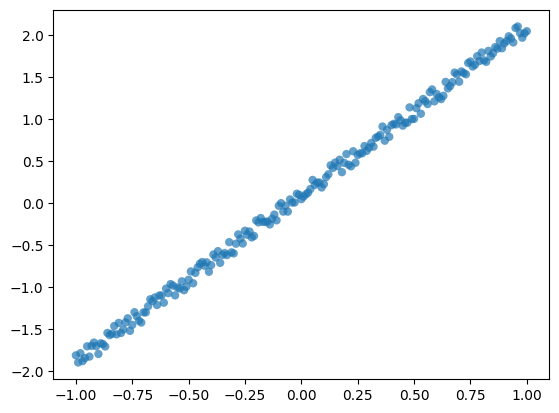

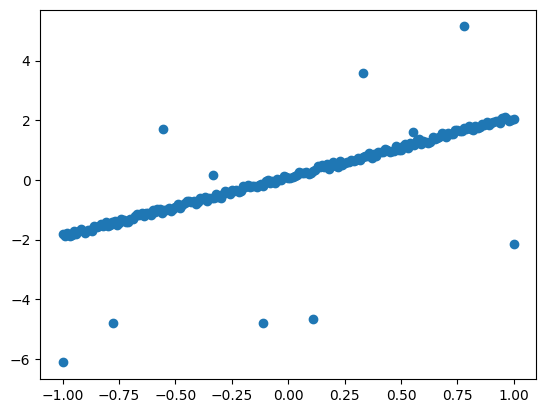

In [201]:
x1 = np.linspace(-1, 1, 201)
x2 = [i * 2 + np.random.rand() * 0.2 for i in x1]

arr = np.array([x1, x2])

plt.scatter(x1, x2, alpha=0.7, edgecolors="none")

x1_aug = [*x1, *np.linspace(-1, 1, 10)]
x2_aug = [*x2, *[i * 2 + np.random.rand() * 10 - 5 for i in np.linspace(-1, 1, 10)]]
augmented = np.array([x1_aug, x2_aug])

plt.figure()
plt.scatter(x1_aug, x2_aug)
print(augmented)